<a href="https://colab.research.google.com/github/saipragna25/deep-learning-vision-classifiers-assignment/blob/main/DL_Vision_Classifiers_Part2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image augmentation 

In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

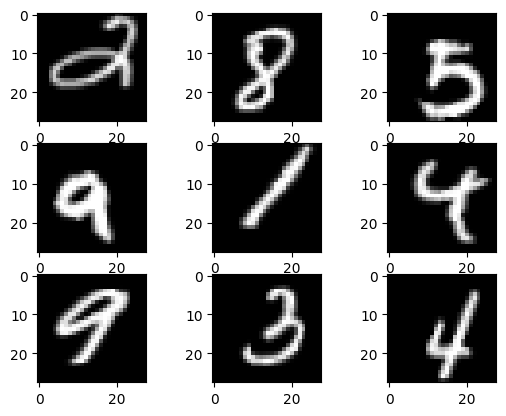

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the data to include a channel dimension
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
)

# fit parameters from data
datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break


Mlp-mixer

In [9]:
!pip install mlp-mixer-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mlp-mixer-keras: filename=mlp_mixer_keras-0.0.5-py3-none-any.whl size=4668 sha256=e5d4339ef48ebeb9dba48031037eae3d4efd865abbfe436e8768eceaba725477
  Stored in directory: /root/.cache/pip/wheels/aa/c3/43/8a4e96dee3c42c2e8c233e502aa9e8056be939b0e3172aedd9
Successfully built mlp-mixer-keras


In [11]:
from mlp_mixer_keras import MlpMixerModel
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Resize the images to 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

model = MlpMixerModel(input_shape=x_train.shape[1:],
                      num_classes=len(np.unique(y_train)), 
                      num_blocks=4, 
                      patch_size=8,
                      hidden_dim=32, 
                      tokens_mlp_dim=64,
                      channels_mlp_dim=128,
                      use_softmax=True)

model.compile(loss='sparse_categorical_crossentropy', metrics='acc')
model.fit(x_train, y_train, validation_data=(x_test, y_test))


1875/1875 [==============================] - 64s 31ms/step - loss: 0.5730 - acc: 0.8197 - val_loss: 0.2398 - val_acc: 0.9288
